# spectral clustering using diffrent function to assign the cluster

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys
import csv

#from sklearn.datasets import make_moons
from scipy.spatial.distance import pdist, squareform
import sklearn.metrics.pairwise

filename = 'Dataset.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')

In [2]:
euclidean_distance = pdist(data, 'sqeuclidean')#computes pairwise euclidean distance betwwen the vectors
distance_matrix= squareform(euclidean_distance)

In [3]:
#Kernel Matrix K
K = sklearn.metrics.pairwise.polynomial_kernel(distance_matrix, degree=2, coef0=1)

In [4]:
#Calculate eigenvalues and eigenvectors of kernel matrix
n_components = 2
eigenvals, eigenvecs = LA.eigh(K)
eigenvals, eigenvecs = eigenvals[::-1], eigenvecs[:, ::-1]
# Collect the top k eigenvectors (projected examples)
principal_components= np.column_stack([eigenvecs[:, i] for i in range(n_components)])

In [5]:
N = K.shape[0]
principal_components = principal_components / np.sqrt(eigenvals[:n_components] *N)
projected_data = np.dot(K , principal_components )

In [6]:
z = np.delete(eigenvecs, np.s_[3:999], 1)

In [7]:
n_clusters = 4
X = z
n_samples = X.shape[0]
n_features = X.shape[1]

In [8]:
def cluster_assignment(X, centroids , n_clusters):
    current_clusters = [[] for i in range(n_clusters)]
    
    for index, data_point in enumerate(X):
        #ind_arr will contain single value in the 2d array as [[3]]
        ind_arr = np.argwhere(data_point==np.amax(data_point,0, keepdims=True))
        #Take the above single value from the 2d array
        nearest_centroid = ind_arr[0][0]
        current_clusters[nearest_centroid].append(index)
    return current_clusters

In [9]:
def centroid_initialization(X , n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    #initial assignment (random)
    for i in range(n_clusters):
        centroid_current_cluster = X[np.random.choice(range(n_samples))]
        centroids[i] = centroid_current_cluster

    return centroids

In [10]:
centroids = centroid_initialization(X, n_clusters)

In [11]:
current_clusters = cluster_assignment(X , centroids, n_clusters)

In [12]:
def update_centroids(X, current_clusters, n_clusters):
    centroids = np.zeros((n_clusters, n_features))
    for index, cluster in enumerate(current_clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[index] = new_centroid
    return centroids

In [13]:
centroids = update_centroids(X , current_clusters, n_clusters)

C:\Users\smaganah\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\smaganah\Anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [14]:
#Even though the iteration is run over 500 times the K-Means algo will never converge.
n_iter = 500
centroids = centroid_initialization(X, n_clusters)
for it in range(n_iter):
    clusters = cluster_assignment(X, centroids,n_clusters)
    previous_centroids = centroids.copy()
    centroids = update_centroids(X, clusters, n_clusters)
    diff = centroids - previous_centroids
    
    if not diff.any():
        print("K-Means Converged")
        break

In [15]:
#Assigning clusters_ids to all data points
y_pred = np.zeros(n_samples)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        y_pred[index] = cluster_id

Text(0, 0.5, 'Y axis: Feature 2')

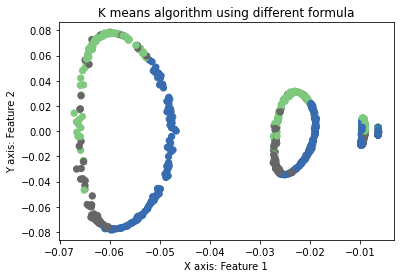

In [16]:
#Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap= 'Accent')
plt.title("K means algorithm using different formula")
plt.xlabel("X axis: Feature 1")
plt.ylabel("Y axis: Feature 2")